# Taller: Análisis de Instagram con Apify API + Gemini  
Autor: Juan Alejandro Tobos  
Fecha de generación: 2025-05-21


**Objetivos**

1. Obtener datos públicos de Instagram usando el actor **`apify/instagram-api-scraper`**.  
2. Limpiar y pre‑procesar captions e información de posts.  
3. Clasificar sentimiento de captions con la API de Google Generative AI (Gemini).  
4. Extraer temas dominantes con LDA y nombrarlos con Gemini.  
5. Segmentar autores o posts según métricas de engagement.  
6. Diseñar una micro‑campaña basada en los insights descubiertos.


In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv

--2025-11-19 23:27:23--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv [following]
--2025-11-19 23:27:24--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18361753 (18M) [text/plain]
Saving to: ‘instagram_posts.csv’

instagram_posts.csv 100%[===================>]  17.51M 

In [2]:
!pip install -qU requests pandas google-generativeai nltk seaborn wordcloud scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 99.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('instagram_posts.csv')
df.head()

,inputUrl,id,username,url,fullName,biography,externalUrls,externalUrl,externalUrlShimmed,followersCount,...,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,locationName,locationId,paidPartnership,sponsors
0,https://www.instagram.com/f1/,3637646598679593202,f1,https://www.instagram.com/p/DJ7hE70tIDy/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/f1/,3637494954817152582,f1,https://www.instagram.com/p/DJ6-mOeJuZG/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,f1movie,Original audio,True,False,NaN,1.403914e+15,NaN,NaN,NaN,NaN
2,https://www.instagram.com/f1/,3637535605467005779,f1,https://www.instagram.com/p/DJ7H1xVskNT/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/f1/,3635278159597499148,f1,https://www.instagram.com/p/DJzGjnCi3MM/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/f1/,3637456706674459999,f1,https://www.instagram.com/p/DJ615pHMYVf/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,Monaco,16366456.0,NaN,NaN



### 🔍 Preguntas – Sección 1 (Exploración)

1. ¿Cuántos posts hay en total?  
2. ¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan?  
3. ¿Cuál es el rango de fechas cubierto por los posts?  
4. ¿Qué post obtuvo más 'likes' y cuál crees que es la razón?


In [5]:
df.shape
df.describe()

,id,followersCount,followsCount,highlightReelCount,businessCategoryName,igtvVideoCount,postsCount,fbid,commentsCount,dimensionsHeight,dimensionsWidth,likesCount,ownerId,videoViewCount,videoPlayCount,videoDuration,musicInfo.should_mute_audio_reason,musicInfo.audio_id,locationId
count,2.000000e+02,200.0,200.0,200.0,0.0,200.0,200.0,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,8.600000e+01,8.600000e+01,86.000000,0.0,8.600000e+01,1.100000e+01
mean,3.632326e+18,34614194.0,102.0,4.0,NaN,389.0,27715.0,1.784140e+16,1754.445000,1386.590000,975.500000,4.660587e+05,2.281623e+09,1.971775e+05,5.756870e+06,38.908047,NaN,3.450803e+15,5.730304e+06
std,3.767033e+15,0.0,0.0,0.0,NaN,0.0,0.0,1.604015e+01,2905.344781,271.902569,178.752657,3.748816e+05,6.000891e+09,6.675044e+05,4.412142e+06,28.679130,NaN,4.817216e+15,7.830734e+06
min,3.625445e+18,34614194.0,102.0,4.0,NaN,389.0,27715.0,1.784140e+16,58.000000,421.000000,640.000000,8.188100e+04,2.609536e+07,0.000000e+00,1.745684e+06,8.173000,NaN,3.839541e+14,9.747600e+04
25%,3.628862e+18,34614194.0,102.0,4.0,NaN,389.0,27715.0,1.784140e+16,302.750000,1333.000000,750.000000,2.073838e+05,1.692820e+09,0.000000e+00,3.215885e+06,21.773000,NaN,1.081417e+15,9.747600e+04
50%,3.633606e+18,34614194.0,102.0,4.0,NaN,389.0,27715.0,1.784140e+16,685.000000,1350.000000,1080.000000,3.272370e+05,1.692820e+09,0.000000e+00,4.523196e+06,30.022500,NaN,1.658864e+15,9.747600e+04
75%,3.635287e+18,34614194.0,102.0,4.0,NaN,389.0,27715.0,1.784140e+16,1800.250000,1350.000000,1080.000000,5.877025e+05,1.692820e+09,0.000000e+00,6.369070e+06,51.770500,NaN,3.547741e+15,1.480905e+07
max,3.637647e+18,34614194.0,102.0,4.0,NaN,389.0,27715.0,1.784140e+16,21188.000000,1920.000000,1080.000000,1.927755e+06,6.540359e+10,4.512577e+06,2.753809e+07,187.600000,NaN,2.430289e+16,1.636646e+07


In [6]:
print(df.columns) # To inspect available columns
# Example for content types, assuming a 'content_type' column exists:
# df['content_type'].value_counts()

Index(['inputUrl', 'id', 'username', 'url', 'fullName', 'biography',
       'externalUrls', 'externalUrl', 'externalUrlShimmed', 'followersCount',
       'followsCount', 'hasChannel', 'highlightReelCount', 'isBusinessAccount',
       'joinedRecently', 'businessCategoryName', 'private', 'verified',
       'profilePicUrl', 'profilePicUrlHD', 'igtvVideoCount', 'relatedProfiles',
       'latestIgtvVideos', 'postsCount', 'fbid', 'type', 'shortCode',
       'caption', 'hashtags', 'mentions', 'commentsCount', 'firstComment',
       'latestComments', 'dimensionsHeight', 'dimensionsWidth', 'displayUrl',
       'images', 'alt', 'likesCount', 'timestamp', 'childPosts',
       'ownerFullName', 'ownerUsername', 'ownerId', 'isSponsored',
       'taggedUsers', 'coauthorProducers', 'isCommentsDisabled', 'videoUrl',
       'videoViewCount', 'videoPlayCount', 'productType', 'videoDuration',
       'isPinned', 'musicInfo.artist_name', 'musicInfo.song_name',
       'musicInfo.uses_original_audio', 'musicI

In [7]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["timestamp"].describe()

,timestamp
count,200
mean,2025-05-14 12:52:37.414999808+00:00
min,2025-05-05 00:59:11+00:00
25%,2025-05-09 18:08:00.500000+00:00
50%,2025-05-16 07:23:13+00:00
75%,2025-05-18 14:53:41.249999872+00:00
max,2025-05-21 21:01:28+00:00


In [9]:
df["likesCount"]==df["likesCount"].max()

,likesCount
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False



## 🧹 Sección 2 (Limpieza)

Explica por qué es importante limpiar y normalizar el texto de los captions.  
Enumera tres tipos de “ruido” que removerás (URLs, emojis, menciones, etc.) y da un ejemplo de cada uno.


In [10]:
import re, nltk, string
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_caption(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)        # URLs
    text = re.sub(r"@[\w_]+", " ", text)        # Menciones
    text = re.sub(r"[#]", " ", text)             # Hashtags (opcional: conservar)
    text = re.sub(r"[{}]".format(string.punctuation), " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['caption_clean'] = df['caption'].fillna("").apply(clean_caption)
df[['caption', 'caption_clean']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,caption,caption_clean
0,It certainly got the drivers’ seal of approval...,it certainly got the drivers’ seal of approval...
1,It’s go time! Get your tickets for #F1TheMovie...,it’s go time get your tickets for f1themovie n...
2,Rolling up to #F1TheMovie! 🤩 Our drivers have ...,rolling up to f1themovie 🤩 our drivers have ar...
3,A DOMINANT WIN FROM MAX VERSTAPPEN!! 👏\n\nThe ...,a dominant win from max verstappen 👏 the reign...
4,Monte Carlo ready 😍🇲🇨\n\n#McLaren #M7AReborn #F1,monte carlo ready 😍🇲🇨 mclaren m7areborn f1


Es fundamental para limpiar los textos y poder generar condicionales a los comentarios que nos permitan identificar el contenido, el tipo y la frecuencia de estos en las opiniones generales.


## 😊 Sección 3 (Sentimiento)

7. Presenta la distribución global de sentimientos y comenta.  
8. ¿Qué tipo de contenido genera mayor proporción de sentimientos positivos y negativos?  
9. Elige un pico de sentimiento negativo y analiza el contexto con un ejemplo de post.


In [11]:
import os

from openai import OpenAI

client = OpenAI()

In [12]:
from openai import OpenAI

client = OpenAI()


In [33]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text

In [38]:
import time

def classify_sentiment(text):
    prompt = (f"Clasifica el sentimiento del siguiente caption de Instagram como "
              f"'positivo', 'neutral' o 'negativo' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)


<Axes: xlabel='sentimiento'>

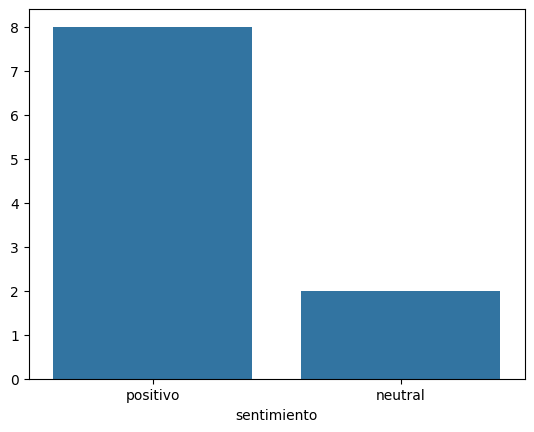

In [26]:
sample['sentimiento'].value_counts()
import seaborn as sns
sns.barplot(x=sample['sentimiento'].value_counts().index, y=sample['sentimiento'].value_counts().values)
#


## 🗂 Sección 4 (Temas)
9. Haga lo mismo con sentidimiento con tipo de contenido y tema
10. Lista los nombres de los temas generados. ¿Alguno es inesperado?  
11. Con un heatmap *tipo de contenido × tema*, indica qué tema es “propiedad” de cada formato.  
12. Para el tema dominante, proporciona dos insights accionables.


In [17]:
import time

def classify_topic(text):
    prompt = (f"Clasifica el tipo de contenido del siguiente caption de Instagram como "
              f"'resultados_estadisticas', 'tecnologia_vehiculos' o 'entre_bastidores' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

# ⚠️ Usa una muestra para no exceder la cuota de la API
sample = df.sample(10, replace = True ,random_state=42)
sample['topic'] = sample['caption_clean'].apply(classify_topic)


In [39]:
# ⚠️ Usa una muestra para no exceder la cuota de la API
sample = df.sample(10, replace = True ,random_state=42)
sample['sentimiento'] = sample['caption_clean'].apply(classify_sentiment)
sample['topic'] = sample['caption_clean'].apply(classify_topic)

print("Sentimiento Value Counts:")
print(sample['sentimiento'].value_counts())
print("\nTopic Value Counts:")
print(sample['topic'].value_counts())


Sentimiento Value Counts:
sentimiento
positivo    8
neutral     2
Name: count, dtype: int64

Topic Value Counts:
topic
entre_bastidores           7
resultados_estadisticas    3
Name: count, dtype: int64


<Axes: xlabel='topic', ylabel='type'>

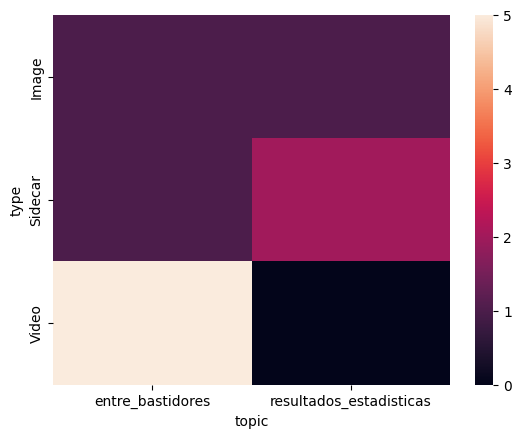

In [19]:
sns.heatmap(pd.crosstab(sample["type"],sample["topic"]))

<Axes: xlabel='topic', ylabel='sentimiento'>

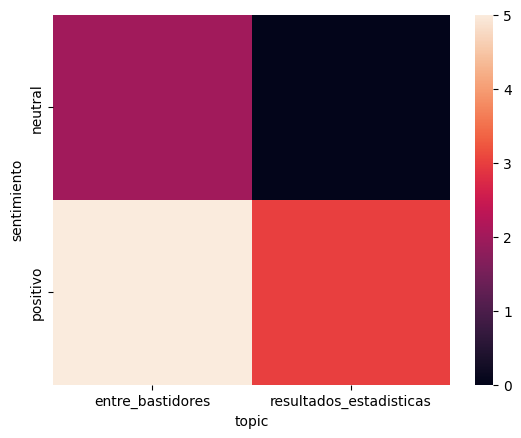

In [40]:
import seaborn as sns
import pandas as pd

sns.heatmap(pd.crosstab(sample["sentimiento"],sample["topic"]))

In [37]:
import time

def classify_topic(text):
    prompt = (f"Clasifica el tipo de contenido del siguiente caption de Instagram como "
              f"'resultados_estadisticas', 'tecnologia_vehiculos' o 'entre_bastidores' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)



## 👥 Sección 5 (Segmentación)

13. Describe cada cluster en una frase (actividad y tono).  
14. ¿Qué segmento priorizarías para viralizar un mensaje y por qué?  
15. Propón una acción de engagement distinta para cada segmento.


In [53]:
call_llm("Para cada categoria describe cada cluster en una frase (actividad y tono). Damelo en lista de python donde la llave sea actividad y tono")

'Aquí tienes una lista en formato Python que describe cada cluster de actividad y tono:\n\n```python\nclusters = {\n    "Deportes": {\n        "Competitivo": "Un grupo apasionado se desafía en intensas competencias deportivas.",\n        "Recreativo": "Amigos disfrutan de un día jugando fútbol en un ambiente relajado."\n    },\n    "Arte": {\n        "Creativo": "Artistas se sumergen en la creación, explorando nuevas técnicas y conceptos.",\n        "Cultural": "Exposiciones muestran la riqueza del patrimonio artístico en un ambiente formal."\n    },\n    "Entretenimiento": {\n        "Dramático": "Un elenco ofrece una actuación conmovedora que atrapa la atención del público.",\n        "Humorístico": "Comediantes despliegan su mejor repertorio para hacer reír a la audiencia."\n    },\n    "Educación": {\n        "Formal": "Profesores explican conceptos complejos en un entorno académico riguroso.",\n        "Interactivo": "Estudiantes participan en dinámicas de grupo para aprender de m


## 📝 Sección 6 (Micro‑campaña)

16. Presenta tus tres captions generados.  
17. Justifica  
&nbsp;&nbsp;a) Tema elegido.  
&nbsp;&nbsp;b) Tono y horario óptimos.  
18. Define un KPI de éxito y la meta para la campaña.


In [61]:
lista_tonos = [
    {
        "categoria": "Deportes",
        "descripcion": "Entrenamientos enérgicos con un tono motivador que inspiren a los participantes a superarse."
    },
    {
        "categoria": "Cultura",
        "descripcion": "Charlas enriquecedoras con un tono reflexivo que invitan a explorar diferentes perspectivas artísticas."
    },
    {
        "categoria": "Tecnología",
        "descripcion": "Demostraciones interactivas con un tono innovador que sorprendan a los asistentes sobre las últimas tendencias."
    },
    {
        "categoria": "Salud",
        "descripcion": "Talleres informativos con un tono empático que promuevan el bienestar y autoconocimiento de los participantes."
    },
    {
        "categoria": "Entretenimiento",
        "descripcion": "Espectáculos divertidos con un tono alegre que generen risas y desconexión de la rutina diaria."
    },
    {
        "categoria": "Viajes",
        "descripcion": "Aventuras exploratorias con un tono intrigante que despierten la curiosidad por nuevos destinos."
    },
    {
        "categoria": "Cocina",
        "descripcion": "Clases prácticas con un tono amigable que fomenten la creatividad en la cocina y la experimentación de sabores."
    },
    {
        "categoria": "Autoayuda",
        "descripcion": "Sesiones motivacionales con un tono esperanzador que impulsen a los participantes a alcanzar sus metas personales."
    }
]

In [60]:
def generar_caption(topic, tone='inspirador'):
    prompt = (f"Actúa como community manager. Crea un caption de máximo 220 caracteres "
              f"sobre el tema '{topic}'. Tono {tone}. No incluyas hashtags ni menciones.")
    return call_llm(prompt)

for item in lista_tonos:

    print(generar_caption(lista["categoria"]))
    print("__________")

La autoayuda es un viaje hacia el descubrimiento de tu mejor versión. Recuerda que cada pequeño paso cuenta; la transformación comienza en el interior. ¡Hoy es el día perfecto para dar el primer paso!
__________
La verdadera transformación comienza desde dentro. Cada paso que das hacia el autocuidado y la reflexión te acerca más a la mejor versión de ti mismo. Hoy es el día para invertir en tu bienestar. ¡Empieza ahora!
__________
La verdadera transformación comienza cuando decides creer en ti. Cada pequeño paso que das es un acto de valentía. Abre tu mente, nutre tu corazón y recuerda: el poder está en tus manos. ¡Hoy es el día para empezar!
__________
A veces, el mayor viaje comienza con un solo paso hacia el interior. Recuerda que cada pequeño avance cuenta. Abraza tu proceso, aprende de tus desafíos y confía en tu fuerza. ¡Eres capaz de lograrlo todo!
__________
A menudo, el camino hacia el crecimiento personal comienza con un pequeño paso. Hoy, regálate un momento para reflexionar

Defino como kpi el siguiente: "respuestas efectivas" y el objetivo es aumentar un 20% los comentarios positivos en las publicaciones.


### 📦 Exporta y entrega

1. Ejecuta todo el notebook (**Runtime → Run all**).  
2. Descarga el notebook (File → Download → .ipynb) y el memo en *PDF* o *Markdown*.  
3. Sube ambos archivos a la plataforma de la clase antes de la fecha establecida.
